# Candlestick Three Outside Up/Down

https://www.investopedia.com/terms/t/three-outside-updown.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'GME'
start = '2020-01-01'
end = '2021-10-08'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,6.14,6.47,6.07,6.31,6.31,4453600
2020-01-03,6.21,6.25,5.84,5.88,5.88,3543900
2020-01-06,5.80,5.91,5.60,5.85,5.85,3394800
2020-01-07,5.77,5.83,5.44,5.52,5.52,5228000
2020-01-08,5.49,5.85,5.41,5.72,5.72,5629400


## Candlestick with Three Outside Up/Down

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,737426.0,6.14,6.47,6.07,6.31,6.31,4453600,True
1,737427.0,6.21,6.25,5.84,5.88,5.88,3543900,False
2,737430.0,5.80,5.91,5.60,5.85,5.85,3394800,True
3,737431.0,5.77,5.83,5.44,5.52,5.52,5228000,False
4,737432.0,5.49,5.85,5.41,5.72,5.72,5629400,True


Text(0, 0.5, 'Price')

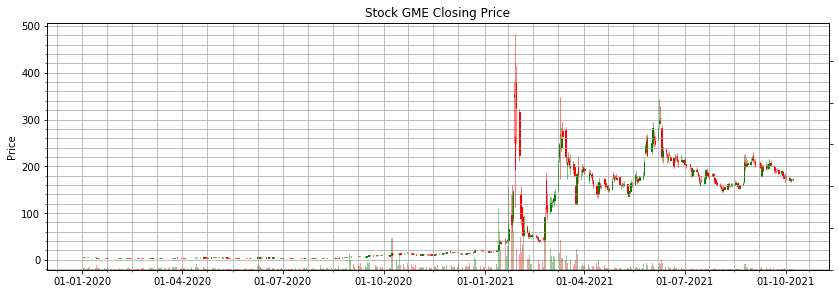

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
three_outside = talib.CDL3OUTSIDE(df['Open'], df['High'], df['Low'], df['Close'])

three_outside = three_outside[three_outside != 0]

In [6]:
df['three_outside'] = talib.CDL3OUTSIDE(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['three_outside'] !=0]

,Open,High,Low,Close,Adj Close,Volume,three_outside
Date,,,,,,,
2020-01-27,4.200000,4.350000,4.160000,4.280000,4.280000,2122500,-100
2020-02-07,4.110000,4.130000,3.770000,3.810000,3.810000,2742300,-100
2020-03-30,4.220000,4.270000,3.650000,3.650000,3.650000,3350600,-100
2020-04-09,3.600000,4.250000,3.490000,3.890000,3.890000,5908600,100
2020-05-18,4.400000,4.630000,4.360000,4.580000,4.580000,2364200,100
2020-05-29,4.330000,4.420000,4.050000,4.060000,4.060000,3961700,-100
2020-07-06,4.310000,4.340000,4.190000,4.240000,4.240000,2140900,-100
2020-09-10,6.650000,6.950000,6.190000,6.230000,6.230000,15558300,-100
2020-09-24,9.710000,9.810000,9.010000,9.140000,9.140000,7938800,-100


In [8]:
df['Adj Close'].loc[df['three_outside'] !=0]

Date
2020-01-27      4.280000
2020-02-07      3.810000
2020-03-30      3.650000
2020-04-09      3.890000
2020-05-18      4.580000
2020-05-29      4.060000
2020-07-06      4.240000
2020-09-10      6.230000
2020-09-24      9.140000
2020-11-10     11.100000
2020-11-27     16.080000
2021-02-17     45.939999
2021-03-23    181.750000
2021-05-18    180.669998
2021-07-13    180.059998
2021-07-20    191.179993
2021-09-16    206.369995
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['three_outside'] !=0].index

DatetimeIndex(['2020-01-27', '2020-02-07', '2020-03-30', '2020-04-09',
               '2020-05-18', '2020-05-29', '2020-07-06', '2020-09-10',
               '2020-09-24', '2020-11-10', '2020-11-27', '2021-02-17',
               '2021-03-23', '2021-05-18', '2021-07-13', '2021-07-20',
               '2021-09-16'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
three_outside

Date
2020-01-27   -100
2020-02-07   -100
2020-03-30   -100
2020-04-09    100
2020-05-18    100
2020-05-29   -100
2020-07-06   -100
2020-09-10   -100
2020-09-24   -100
2020-11-10   -100
2020-11-27    100
2021-02-17   -100
2021-03-23   -100
2021-05-18    100
2021-07-13   -100
2021-07-20    100
2021-09-16    100
dtype: int32

In [11]:
three_outside.index

DatetimeIndex(['2020-01-27', '2020-02-07', '2020-03-30', '2020-04-09',
               '2020-05-18', '2020-05-29', '2020-07-06', '2020-09-10',
               '2020-09-24', '2020-11-10', '2020-11-27', '2021-02-17',
               '2021-03-23', '2021-05-18', '2021-07-13', '2021-07-20',
               '2021-09-16'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,three_outside
Date,,,,,,,
2020-01-02,6.140000,6.470000,6.070000,6.310000,6.310000,4453600,0
2020-01-03,6.210000,6.250000,5.840000,5.880000,5.880000,3543900,0
2020-01-06,5.800000,5.910000,5.600000,5.850000,5.850000,3394800,0
2020-01-07,5.770000,5.830000,5.440000,5.520000,5.520000,5228000,0
2020-01-08,5.490000,5.850000,5.410000,5.720000,5.720000,5629400,0
...,...,...,...,...,...,...,...
2021-10-01,179.399994,179.490005,172.250000,176.910004,176.910004,1551100,0
2021-10-04,175.949997,176.949997,170.770004,171.360001,171.360001,1195700,0
2021-10-05,171.190002,173.169998,166.699997,172.179993,172.179993,1315900,0


Text(0, 0.5, 'Price')

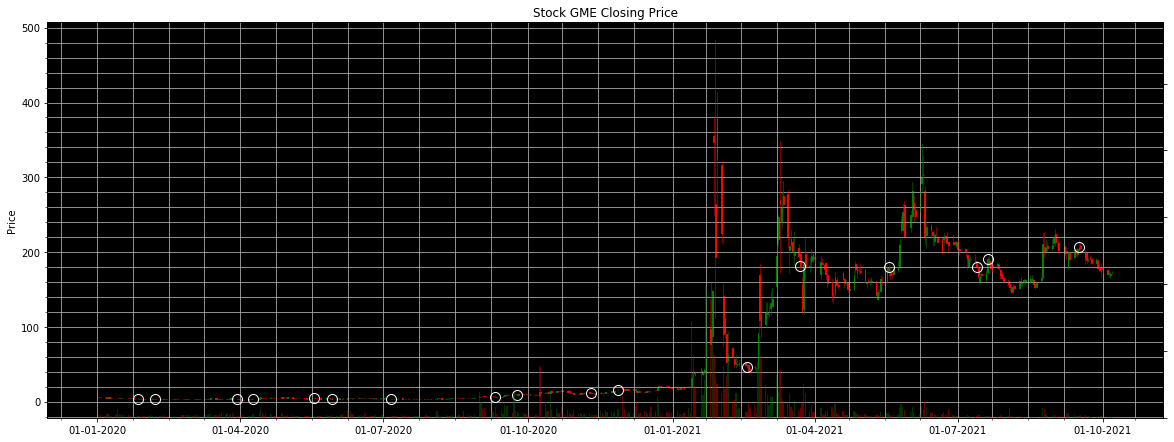

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('black')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['three_outside'] !=0].index, df['Adj Close'].loc[df['three_outside'] !=0],
                'ow', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2020-02-01':'2020-05-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,three_outside,VolumePositive
0,737458.0,3.88,3.98,3.85,3.95,3.95,2025600,0,True
1,737459.0,4.03,4.25,3.97,4.07,4.07,3563100,0,True
2,737460.0,4.15,4.41,4.14,4.18,4.18,2641700,0,True
3,737461.0,4.20,4.30,4.14,4.14,4.14,1510300,0,False
4,737462.0,4.11,4.13,3.77,3.81,3.81,2742300,-100,False


Text(0, 0.5, 'Price')

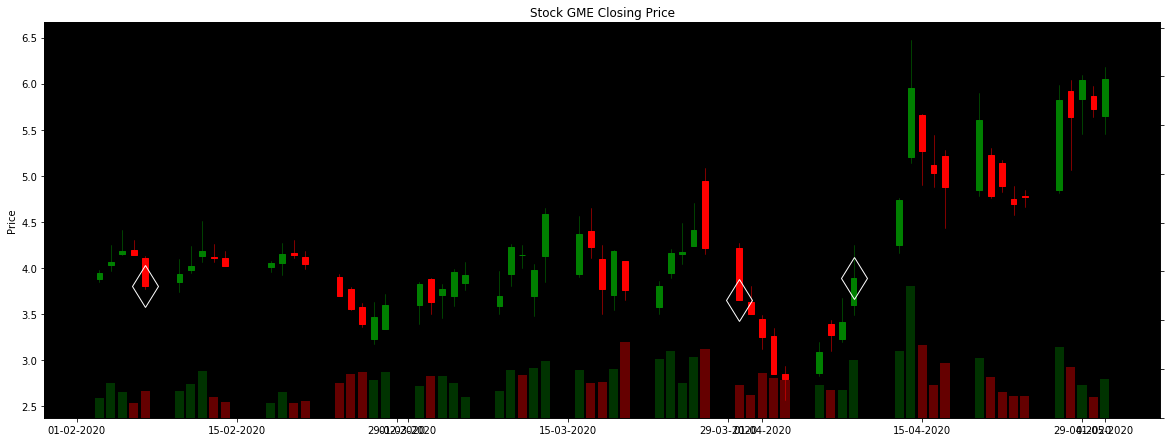

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('black')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['three_outside'] !=0].index, df['Adj Close'].loc[df['three_outside'] !=0],
                'dw', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=30.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

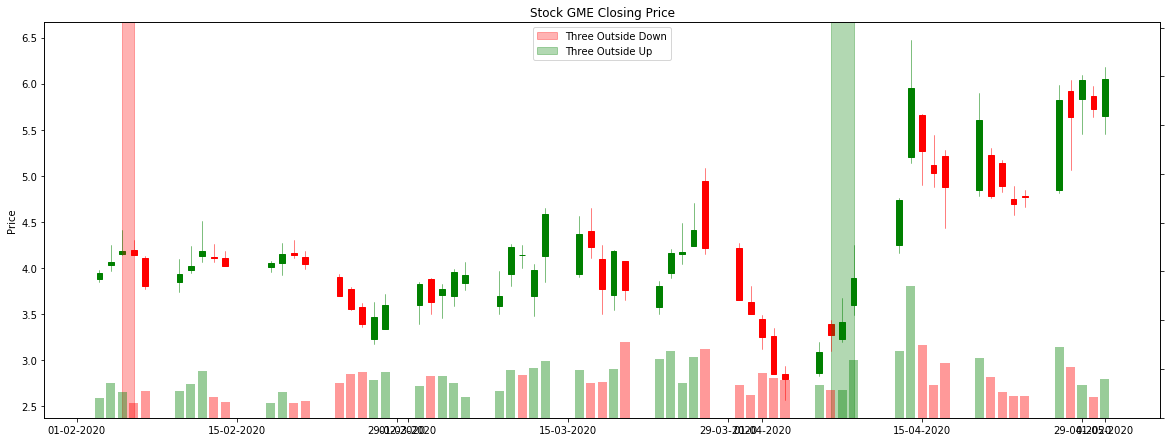

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2020,2,5)), date2num(datetime(2020,2,6)), 
           label="Three Outside Down",color="red", alpha=0.3)
ax.axvspan(date2num(datetime(2020,4,7)), date2num(datetime(2020,4,9)), 
           label="Three Outside Up",color="green", alpha=0.3)
ax.legend(loc='upper center')
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')